In [2]:
import pandas as pd
!pip install helpers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from helpers import *
import plotly.express as px
from datetime import datetime
import statsmodels.formula.api as smf

In [6]:
global_mr=pd.read_csv('Global_Mobility_Report.csv')
global_mr

/var/folders/t5/ybbb15kd2qlg09mzpg5d87ch0000gn/T/ipykernel_73871/329558057.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  global_mr=pd.read_csv('Global_Mobility_Report.csv')


,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111407,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-19,NaN,NaN,NaN,NaN,-9.0,NaN
2111408,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-20,NaN,NaN,NaN,NaN,-5.0,NaN
2111409,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-21,NaN,NaN,NaN,NaN,-5.0,NaN
2111410,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2020-08-24,NaN,NaN,NaN,NaN,-4.0,NaN


In [32]:
dfRegions=pd.read_csv('regions.csv')

# Keeping only the columns that we are interested in
dfRegions = dfRegions.loc[:,['name', 'region', 'alpha-2']]


In [30]:
# Creating a list of all possible continents
continents = dfRegions['region'].unique()

# Removing the last element of the 'continents' array, since it's a 'nan' value corresponding to antartica, 
# which can be discarded from our analysis
continents = continents[:-1]

# Creating an array of dataframes, each corresponding to a subset of the previous dataframe containing 
# countries from only one continent
dfsContinents = []
for continent in continents :
    dfsContinents.append(dfRegions[dfRegions['region'] == continent].copy())

In [33]:
# The '.groupby()' and '.mean()' allow us to group the data from different rows corresponding to the same region code, 
# into one row, containing the mean of all the different rows.
global_agg=global_mr.groupby('country_region_code').mean(numeric_only=True).drop(columns='census_fips_code')

In [15]:
continents_column = []

# Creating a copy to avoid unwanted changes later on.
global_agg_copy = global_agg.copy()

# Go through every row (thus every region code).
for i in range(len(global_agg_copy.index)) :
    current_code = global_agg_copy.index[i]
    found_continent = 0

    # Go through every dataframe in the "dfsContinents" array and check to see if current region code is within this dataframe. Since every
    # dataframe corresponds to only one specific continent, if the region code is contained within the dataframe, then the associated
    # continent has been found and thus we exit the loop.
    for df in dfsContinents :
        if current_code in df['alpha-2'].values :
            found_continent  = df.iloc[0]['region']
            break

    continents_column.append(found_continent)

# Adding a 'continents' coluumn to the 'global_agg_copy', associating every region code to its continent.
global_agg_copy['continents'] = continents_column

# Splitting this new dataframe into multiple dataframes, each corresponding to a specific continent, and then storing them in the
# 'dfsGlobal_agg' array.
dfsGlobal_agg = []
for continent in continents :
    dfsGlobal_agg.append(global_agg_copy[global_agg_copy['continents'] == continent].copy())



/var/folders/t5/ybbb15kd2qlg09mzpg5d87ch0000gn/T/ipykernel_73871/3688050906.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)
/var/folders/t5/ybbb15kd2qlg09mzpg5d87ch0000gn/T/ipykernel_73871/3688050906.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)
/var/folders/t5/ybbb15kd2qlg09mzpg5d87ch0000gn/T/ipykernel_73871/3688050906.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)
/var/folders/t5/ybbb15kd2qlg09mzpg5d87ch0000gn/T/ipykernel_73871/3688050906.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=90)
/var/folders/t5/ybbb15kd2qlg09mzpg5d87ch0000gn/T/ipykernel_73871/3688050906.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rot

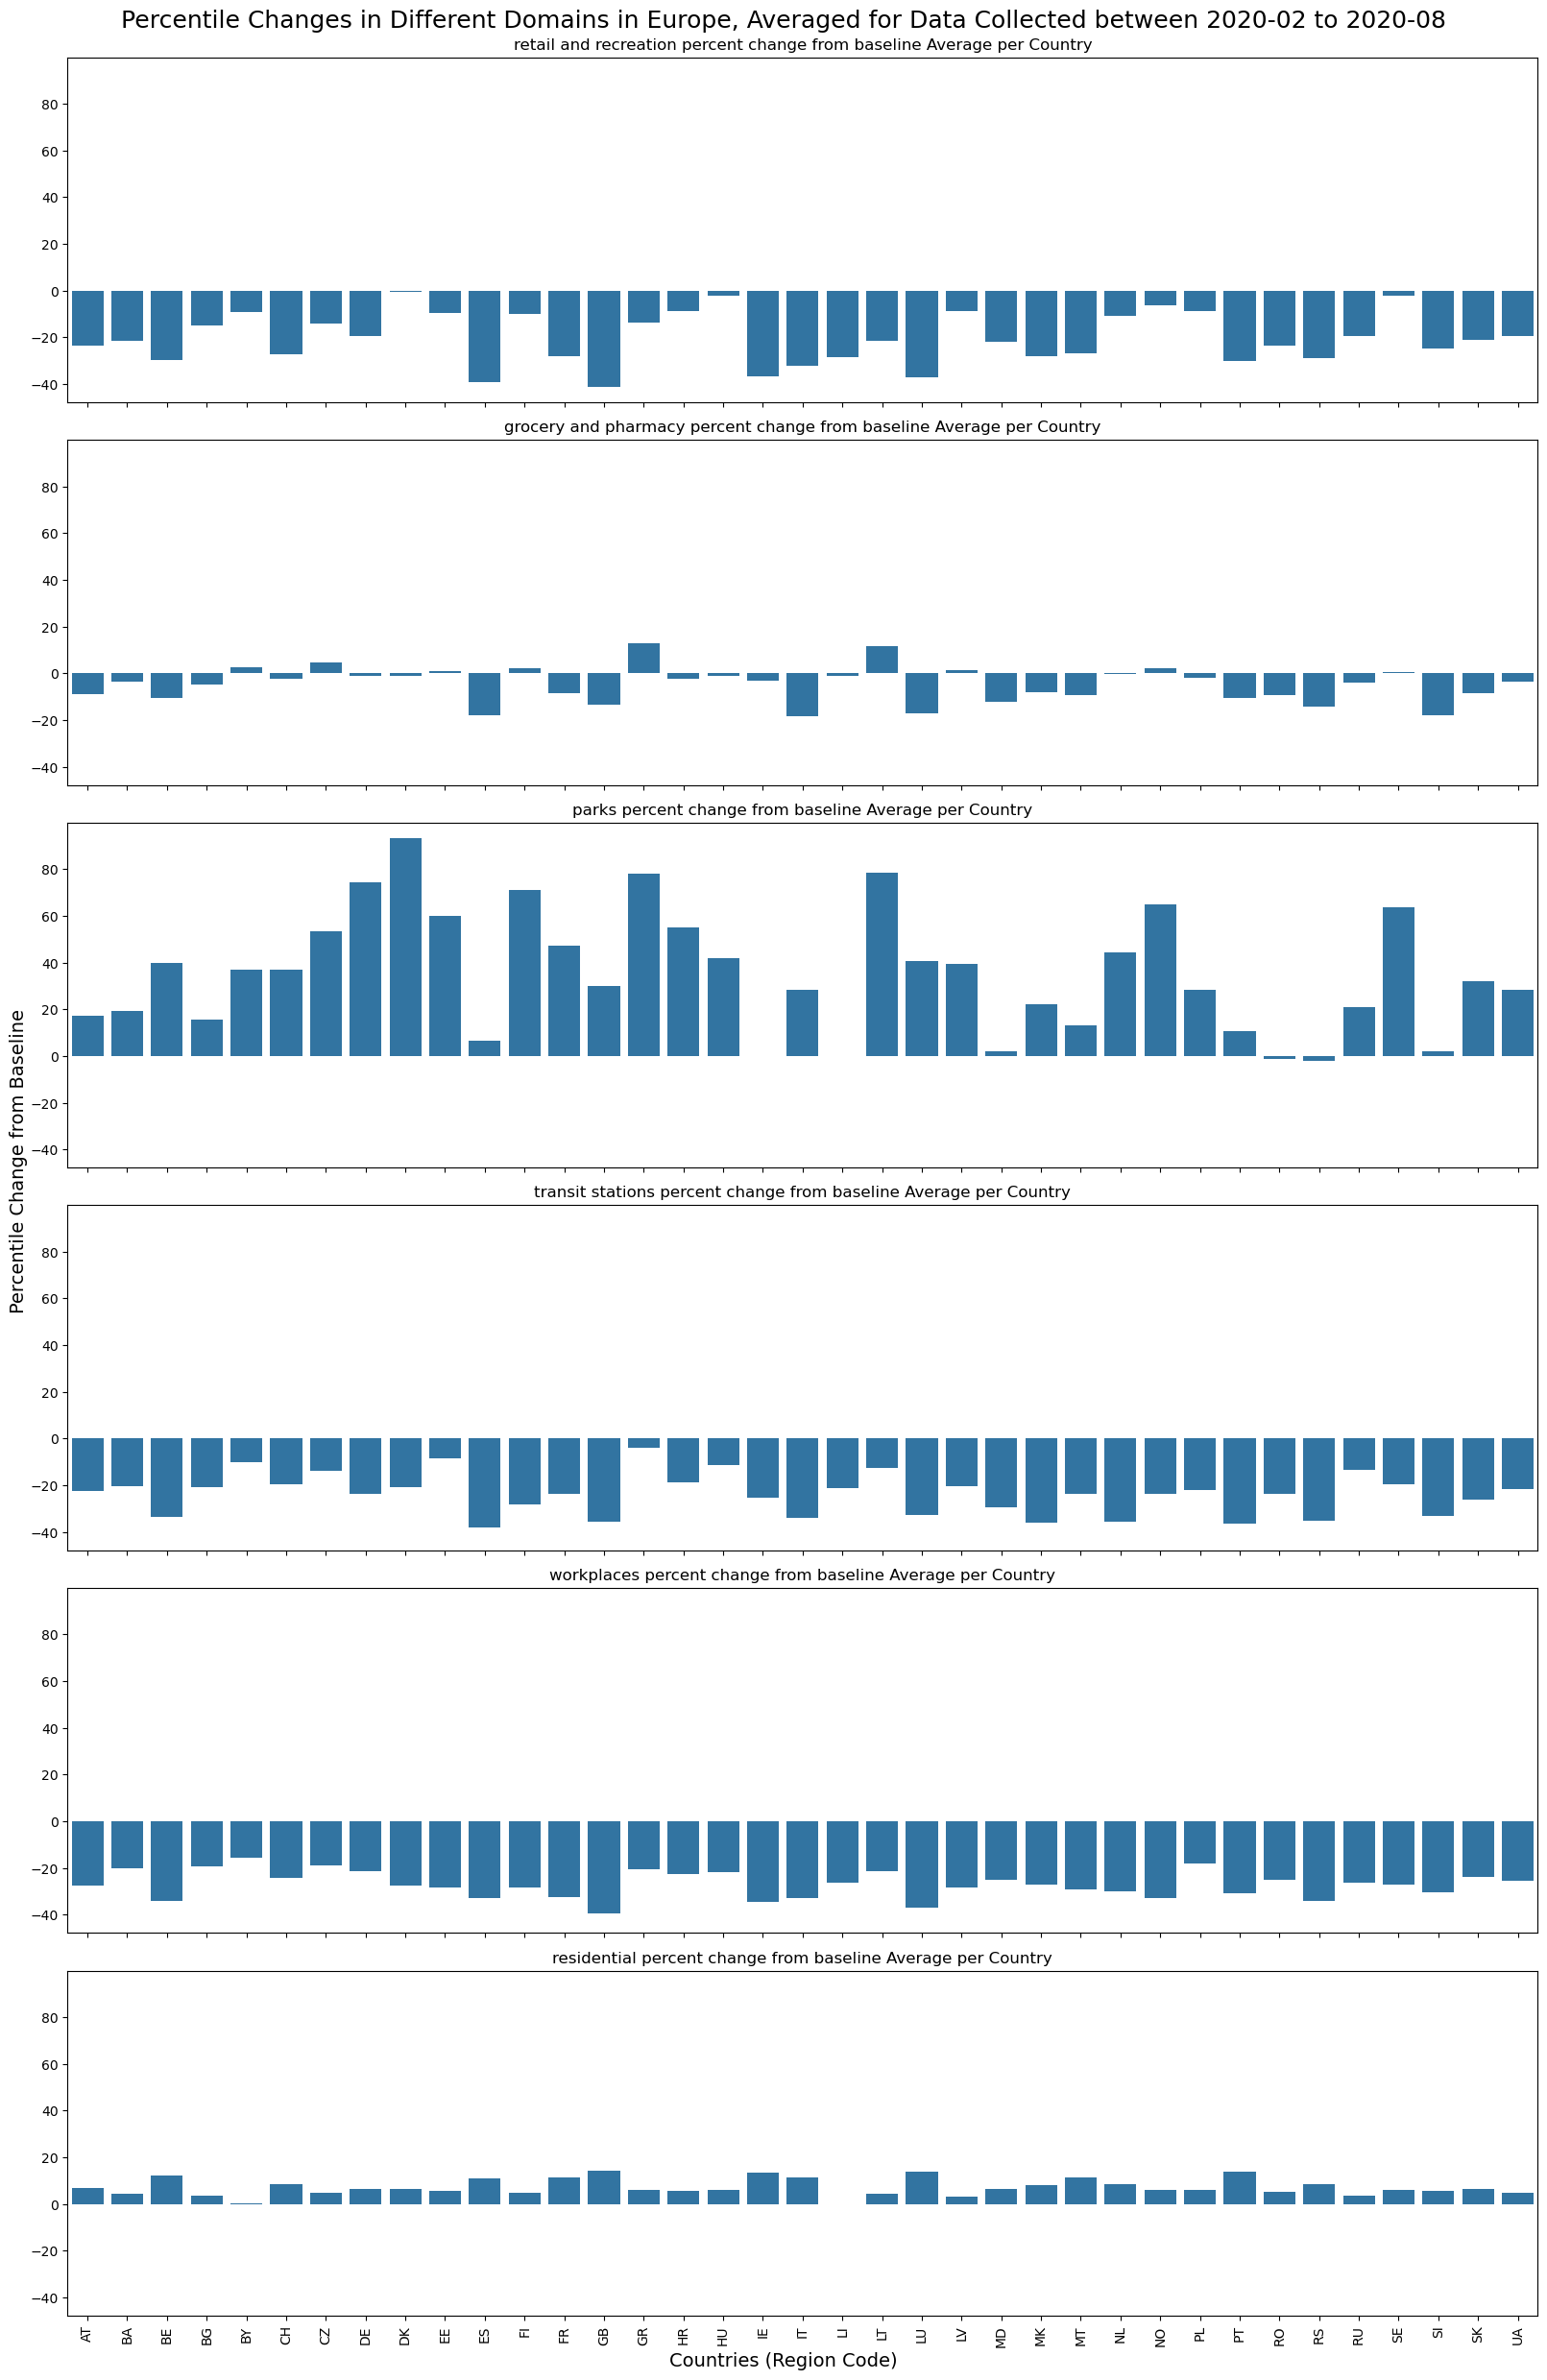

In [16]:
# Figure contains 6 x 1 plots, 6 for each domain, considering only countries within Europe
fig, axs= plt.subplots(6,1,sharey=True,sharex=True,figsize=(16,25))

# Since the most recent dataframe contains an extra column corresponding to the continent of the 
# associated region code (and not a particular domain to be analyzed), we need to retreive the original 
# set of columns corresponding strictly to the domains, which is what we do in the line of code below.
og_columns = global_agg.columns

# Enumertaing of the different dataframes corresponding to the different continents
for j, df  in enumerate(dfsGlobal_agg) :
    if continents[j] == 'Europe' :
        # Enumerating over trhe different columns, and thus the domains
        for i, col in enumerate(og_columns):

            # Proper index formating in order to obtain the correct subplot
            ax=axs[i]

            # Creating a barplot for the specific domain, for a specific continent
            sns.barplot(y=df[col],x=df.index,ax=ax)
            # ax.set_xlabel('Countries (Region Code)')
            ax.set_xlabel('')
            # ax.set_ylabel('Percentage Change from Baseline')
            ax.set_ylabel('')
            ax.set_xticklabels(df.index, rotation=90)
            ax.set_title(str(col).replace('_'," ") + ' Average per Country')
    

fig.text(0.5, 0.00000005, 'Countries (Region Code)', ha='center', va='center', fontsize=14)
fig.text(0.002, 0.5, 'Percentile Change from Baseline',
         ha='center', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()

# Add more space at the top to avoid overlapping between the title and the rest of the figure.
plt.subplots_adjust(top=0.96)

plt.suptitle('Percentile Changes in Different Domains in Europe, Averaged for Data Collected between 2020-02 to 2020-08', fontsize=18)
plt.show()

## Relation between Physiological Needs and Grocery Stores/ Pharmacy

Grocery Stores: These provide essential food and sustenance necessary for survival. Grocery stores offer a variety of food items, including fresh produce, grains, proteins, and other staples, fulfilling the **basic nutritional requirements to maintain life**.

Pharmacies: Medications and healthcare products available at pharmacies address health-related physiological needs. Access to medicines and healthcare items becomes crucial for **maintaining and restoring physical well-being**.

In [83]:
import pandas as pd

df_mean = pd.DataFrame()
row_mean_list = []

# List to store 'grocery_and_pharmacy_percent_change_from_baseline' values
grocery_values = []

for j, df in enumerate(dfsGlobal_agg):
    if continents[j] == 'Europe':
        # Extract numerical columns for mean calculation
        numerical_columns = ['retail_and_recreation_percent_change_from_baseline',
                              'parks_percent_change_from_baseline',
                              'transit_stations_percent_change_from_baseline',
                              'workplaces_percent_change_from_baseline',
                              'residential_percent_change_from_baseline',
                            'grocery_and_pharmacy_percent_change_from_baseline']

        # Calculate the mean for each country excluding 'grocery_and_pharmacy_percent_change_from_baseline'
        country_means = df[numerical_columns].mean(axis=1)

        # Append the mean for each country to the list
        row_mean_list.extend(country_means)

        # Append 'grocery_and_pharmacy_percent_change_from_baseline' values to the list
        grocery_values.extend(df['grocery_and_pharmacy_percent_change_from_baseline'])

# Create the 'Country Code' and 'Mean per Country' columns in df_mean
df_mean['Country Code'] = [code for j, df in enumerate(dfsGlobal_agg) if continents[j] == 'Europe' for code in df.index]
df_mean['Mean_per_Country'] = row_mean_list
df_mean['grocery_and_pharmacy_percent_change'] = grocery_values

# Display the resulting DataFrame
print(df_mean)




   Country Code  Mean_per_Country  grocery_and_pharmacy_percent_change
0            AT         -9.797595                            -9.104878
1            BA         -6.973230                            -3.704663
2            BE         -9.263293                           -10.619171
3            BG         -6.751512                            -4.736377
4            BY          0.784974                             2.575130
5            CH         -4.724324                            -2.483619
6            CZ          2.646142                             4.484629
7            DE          2.461586                            -1.172056
8            DK          8.255858                            -1.084879
9            EE          3.387007                             0.968480
10           ES        -18.483007                           -18.110200
11           FI          1.908970                             2.080774
12           FR         -5.735596                            -8.552938
13    

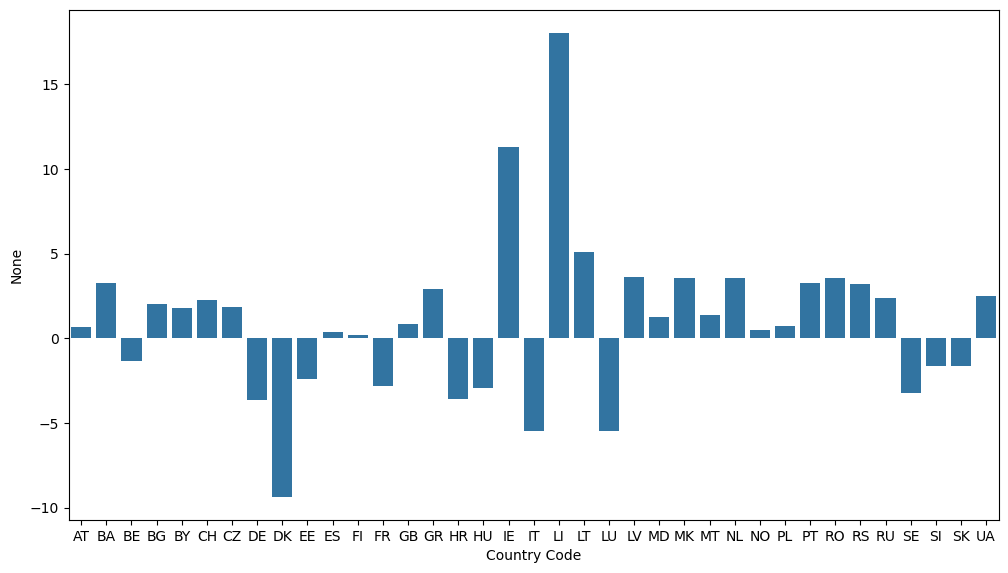

In [85]:
df_difference= df_mean['grocery_and_pharmacy_percent_change'] - df_mean['Mean_per_Country']

# Set the size of the figure
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the values (width, height) as needed

# Create the bar plot
sns.barplot(y=df_difference, x=df_mean['Country Code'], ax=ax)

# Add more space at the top to avoid overlapping between the title and the rest of the figure.
plt.subplots_adjust(top=0.96)

# Show the plot
plt.show()



In [28]:
for i in range(1, 37):
    # Construct the variable name dynamically
    var_name = 'df_' + str(i)
    
    # Construct the file name
    file_name = 'Europe-Physiological-GoogleTrends/multiTimeline (' + str(i) + ').csv'
    
    # Read the CSV file into a dataframe and assign it to the dynamically generated variable
    globals()[var_name] = pd.read_csv(file_name)
    
concatenated_df = pd.concat([df_1, df_2])

display(concatenated_df)

,,,Category: All categories
Week,Grocery store: (Austria),Shopping mall: (Austria),Pharmacy: (Austria)
2019-09-08,7,66,15
2019-09-15,7,59,14
2019-09-22,9,67,14
2019-09-29,7,73,17
...,...,...,...
2020-11-08,0,35,17
2020-11-15,3,32,15
2020-11-22,0,46,15
2020-11-29,9,32,11
